### Overview and Goals - 2018/10/09

To do:

- Centroids
    - Script load csv
    - create plots : % of total urban pop by city size

- Raster
    - Load raster
    - clip raster
    - make mask of NTL thresholds
    - make polygons of zeros and ones with NTL threshold
    - figure out if a point is within a polygon 
    - return sum of values within polygone: GRUMP Pop, total NTL Intensity, NTL Intesnity per area
 
- Data to get
    - GRUMP: Raster UN Adjusted V4 2000 - 2020
    - GRUMP: Raster older ... 1990?
    - NTL DMSP All Years
    - NTL VIIRS All Years
    - Landscan - Whatever is available 
    - WorldPop - Whatever is available 
    - Africapolis 





In [10]:
import os

# set working directory
cwd = os.getcwd()
print(cwd)
os.chdir('/Users/cascade/Github/NightTimeLightsAfrica/data/raw/grumpdata/Centroids/gpw-v4-admin-unit-center-points-population-estimates-rev10_zmb_csv/')

print(cwd)


/Users/cascade/Github/NightTimeLightsAfrica/notebooks
/Users/cascade/Github/NightTimeLightsAfrica/notebooks


In [11]:
import csv
import pandas as pd
import numpy as np

zambia = pd.read_csv('gpw_v4_admin_unit_center_points_population_estimates_rev10_zmb.csv')


In [12]:
zambia_pop = pd.concat([zambia.NAME3, zambia.CENTROID_X, zambia.CENTROID_Y, zambia.UN_2000_E, 
                        zambia.UN_2005_E, zambia.UN_2010_E, zambia.UN_2015_E,
                        zambia.UN_2020_E], axis = 1)
zambia_pop.head()
zambia_pop.tail()

,NAME3,CENTROID_X,CENTROID_Y,UN_2000_E,UN_2005_E,UN_2010_E,UN_2015_E,UN_2020_E
145,Ikelenge Constituency,24.251371,-11.256425,23854,28853,34993,42197,50053
146,Mwinilunga Constituency,24.670649,-11.998788,75591,91433,110888,133719,158613
147,Sinazongwe Constituency,27.281888,-17.412825,87790,97251,108018,119295,129596
148,Sinda Constituency,31.738552,-14.176447,71294,79141,88084,97480,106115
149,Nakonde Constituency,32.594744,-9.488764,81985,102004,127249,157839,192581


In [13]:
#total population for each year
pop_sum = zambia_pop.sum(axis = 0)
pop_sum

NAME3         Wusakile ConstituencyKabwata ConstituencyChika...
CENTROID_X                                              4251.86
CENTROID_Y                                             -2018.78
UN_2000_E                                              10585218
UN_2005_E                                              12043586
UN_2010_E                                              13917434
UN_2015_E                                              16211765
UN_2020_E                                              18882332
dtype: object

In [14]:
# make the percentages of total for each city
zambia_pop['pct_2000'] = zambia_pop.UN_2000_E / 10585218 * 100
zambia_pop['pct_2005'] = zambia_pop.UN_2005_E / 12043586 * 100
zambia_pop['pct_2010'] = zambia_pop.UN_2010_E / 13917434 * 100
zambia_pop['pct_2015'] = zambia_pop.UN_2015_E / 16211765 * 100
zambia_pop['pct_2020'] = zambia_pop.UN_2020_E / 18882332 * 100

zambia_pop.head()

,NAME3,CENTROID_X,CENTROID_Y,UN_2000_E,UN_2005_E,UN_2010_E,UN_2015_E,UN_2020_E,pct_2000,pct_2005,pct_2010,pct_2015,pct_2020
0,Wusakile Constituency,28.220667,-12.928578,77389,89277,103266,118767,134361,0.731104,0.741283,0.741990,0.732598,0.711570
1,Kabwata Constituency,28.310866,-15.468014,97720,134393,185320,254092,342689,0.923174,1.115889,1.331567,1.567331,1.814866
2,Chikankanta Constituency,28.249712,-16.043386,63959,63736,63683,63268,61828,0.604229,0.529211,0.457577,0.390260,0.327438
3,Bwacha Constituency,28.342063,-14.476754,79183,83834,88995,93936,97530,0.748053,0.696088,0.639450,0.579431,0.516515
4,Chisamba Constituency,28.566110,-14.846747,95343,102521,110533,118494,124950,0.900718,0.851250,0.794205,0.730914,0.661730


In [15]:
from ggplot import *

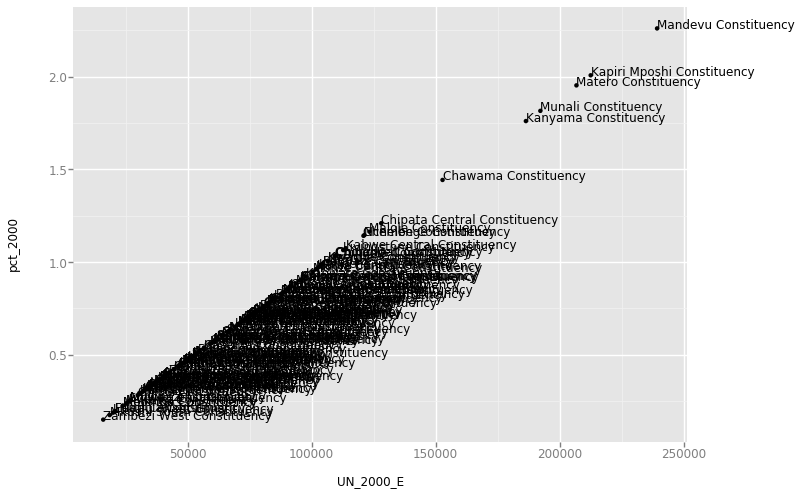

<ggplot: (7545548513)>

In [16]:
ggplot(aes(x='UN_2000_E', y='pct_2000', label = 'NAME3'), data=zambia_pop) +\
    geom_point() +\
    geom_text()
    

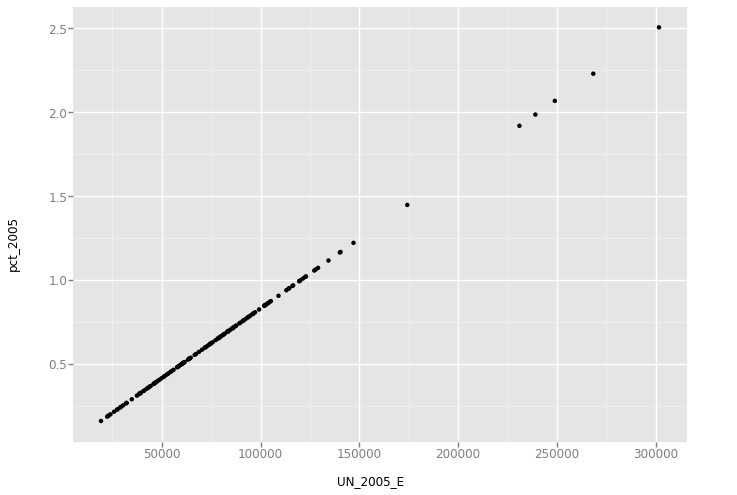

<ggplot: (7545544291)>

In [17]:
ggplot(aes(x='UN_2005_E', y='pct_2005'), data=zambia_pop) +\
    geom_point()

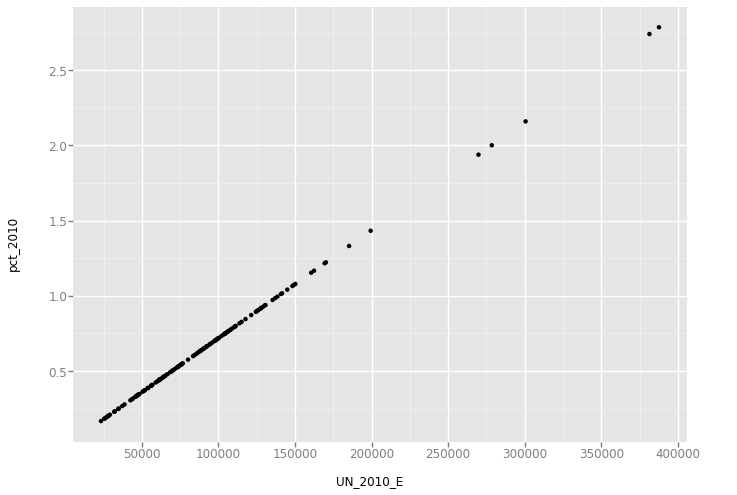

<ggplot: (7547031865)>

In [18]:
ggplot(aes(x='UN_2010_E', y='pct_2010'), data=zambia_pop) +\
    geom_point()

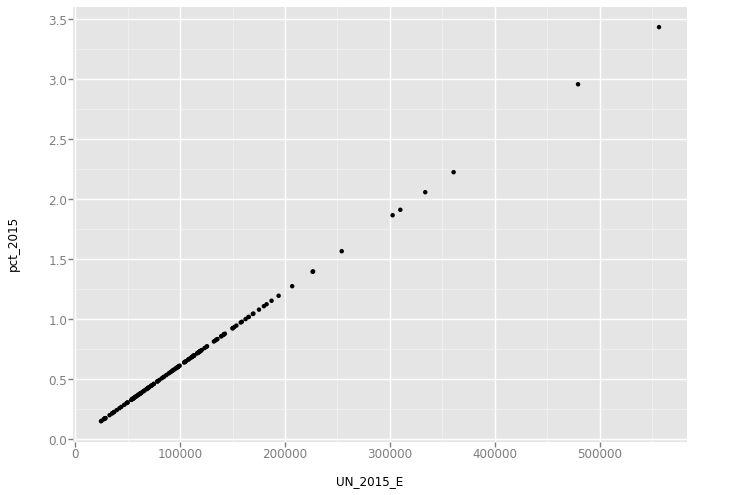

<ggplot: (7547145925)>

In [19]:
ggplot(aes(x='UN_2015_E', y='pct_2015'), data=zambia_pop) +\
    geom_point()

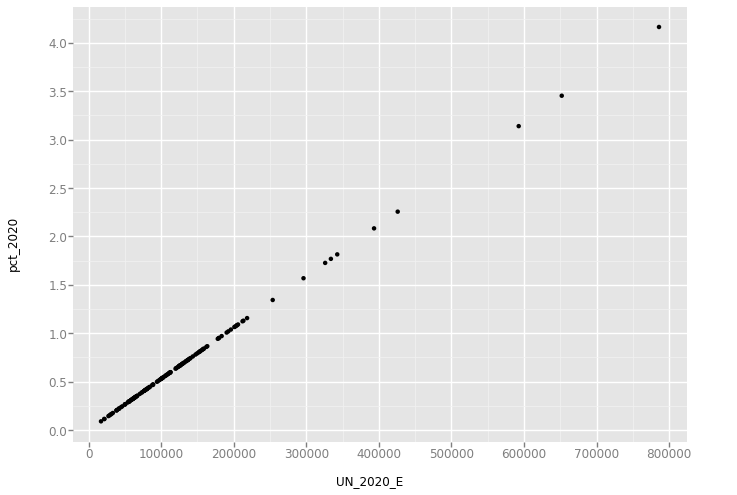

<ggplot: (7547276173)>

In [20]:
ggplot(aes(x='UN_2020_E', y='pct_2020'), data=zambia_pop) +\
    geom_point()

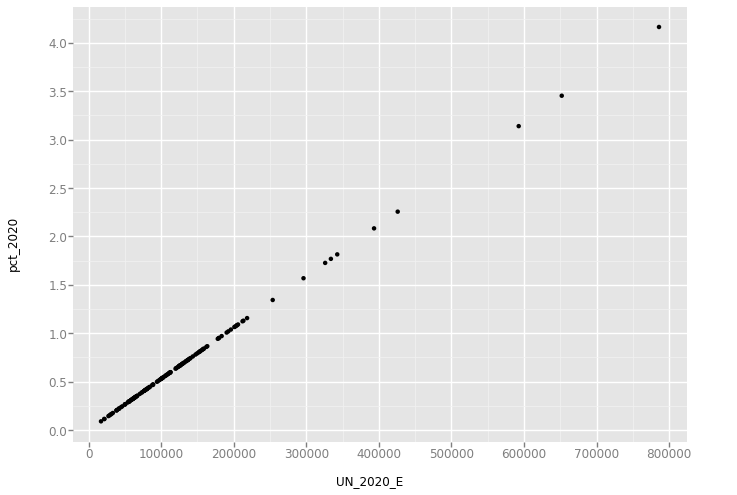

<ggplot: (7547177052)>

In [21]:
ggplot(aes(x='UN_2020_E', y='pct_2020'), data=zambia_pop) +\
    geom_point()

In [22]:
dist_2000_tot = ((zambia.groupby('NAME2')['UN_2000_E'].sum())) 
dist_2000_pct = dist_2000_tot/10585218 * 100
#dist_2000_dict = {'Dist_tot' : dist_2000_tot, 'Dist_pct' : dist_2000_pct}
#dist_2000_df = pd.df(dist_2000_dict)

dist_2000_df = pd.concat([dist_2000_tot, dist_2000_pct], axis=1)
#dist_2000_df['Dist_Name'] = dist_2000_df.index
dist_2000_df.columns = ['pop', 'pct']
dist_2000_df.head(6)
#type(dist_2000_tot)

,pop,pct
NAME2,,
Chadiza District,91637,0.865707
Chama District,75285,0.711228
Chavuma District,32671,0.308647
Chibombo District,263638,2.490624
Chienge District,91466,0.864092
Chililabombwe District,73690,0.696159


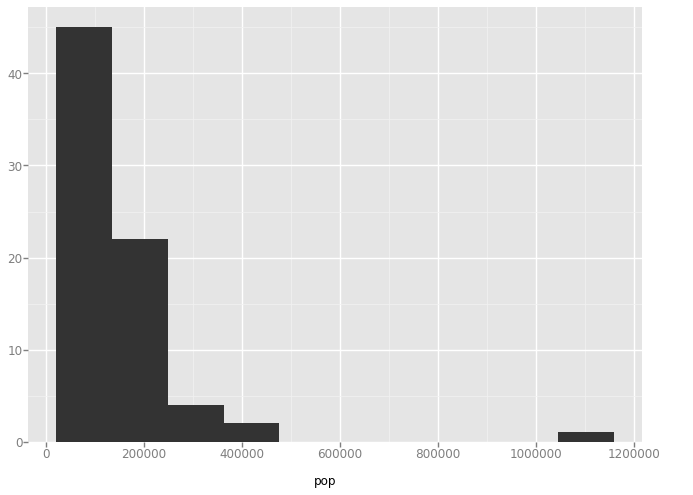

<ggplot: (7548311970)>

In [40]:
# ggplot(aes(x='pop', y='pct'), data=dist_2000_df) +\
#     geom_point()

# X = pop
# Y = pop * constant  

ggplot(aes(x='pop'), data=dist_2000_df) +\
     geom_histogram()

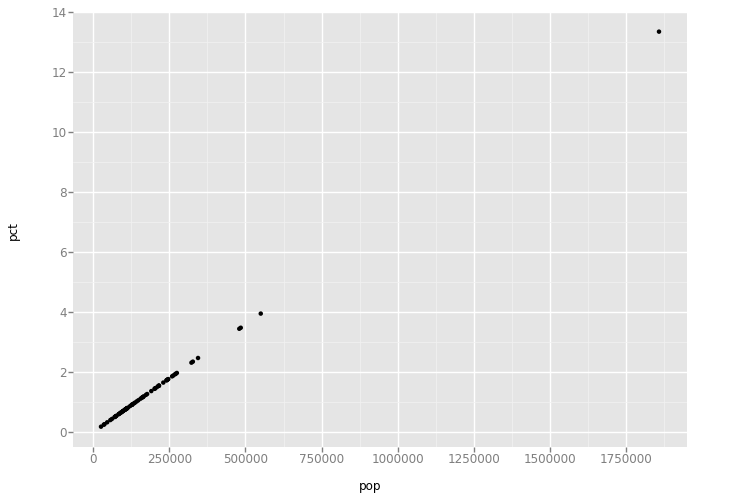

<ggplot: (7547525096)>

In [24]:
dist_2010_tot = ((zambia.groupby('NAME2')['UN_2010_E'].sum())) 
dist_2010_pct = dist_2010_tot/13917434 * 100
dist_2010_df = pd.concat([dist_2010_tot, dist_2010_pct], axis=1)
dist_2010_df.columns = ['pop', 'pct']
dist_2010_df.head(6)

ggplot(aes(x='pop', y='pct'), data=dist_2010_df) +\
    geom_point()

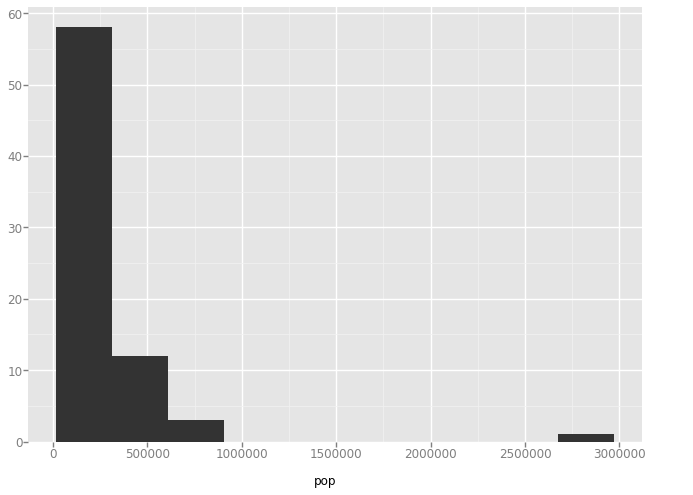

<ggplot: (7548327074)>

In [39]:
dist_2020_tot = ((zambia.groupby('NAME2')['UN_2020_E'].sum())) 
dist_2020_pct = dist_2020_tot/18882332 * 100
dist_2020_df = pd.concat([dist_2020_tot, dist_2020_pct], axis=1)
dist_2020_df.columns = ['pop', 'pct']
dist_2020_df.head(6)

# ggplot(aes(x='pop', y='pct'), data=dist_2020_df) +\
#     geom_point()

ggplot(aes(x='pop'), data=dist_2020_df) +\
    geom_histogram()